# ![LOGO](utlogo.png)

### تمرین سوم درس الگوریتم‌های یادگیری ماشین - امیرحسین مهدی‌نژاد - شماره دانشجویی ۸۱۰۸۰۰۰۵۸

In [9]:
from IPython.core.display import HTML
HTML("<style>.jp-RenderedMarkdown{direction:rtl;display:flex;flex-direction:column;font-family:'IRANSans,Tahoma,Helvetica,sans-serif';margin-top:10px;font-size:1.1rem;direction:rtl}mark{color:#FFF;padding:3px; background-color:#AAAAAAA0}</style>")

### سوال اول
#### اضافه کردن کتابخانه‌های مورد استفاده

In [2]:
!pip install h5py

In [1]:
import h5py
import numpy as np

#### تابع لود کردن داده‌ها

In [2]:
def load_dataset(train_path, test_path):
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

#### پیاده‌سازی تابع زیگموید
##### یک مقدار را به عنوان پارامتر ورودی گرفته و sigmoid آن را محاسبه می‌کند
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [3]:
def sigmoid(z):
    '''
        input: z (a scalar)
        output: sigmoid(z)
    '''
    return 1/(1 + np.exp(-z))

#### مقدار دهی weights و bias
##### وکتور w و b با صفر مقداردهی اولیه می‌شوند

In [4]:
def initialize_with_zeros(dim):
    '''
        input: dim (size of the w vector)
        output: - w: initilized vector of size (dim, 1)
                - b: initialized scalar
    '''
    return np.zeros((dim, 1)), 0

#### پیاده‌سازی forward propagation و backward propagation برای یادگیری پارامترها
#####  بدین منظور از forward propagation برای محاسبه‌ی تابع هزینه و خروجی y استفاده شده و همچنین برای محاسبه‌ی گرادیان نزولی backward propagation را داریم.

$$ a^{(i)} = \sigma(w^Tx^{(i)} + b) $$
$$ J = \frac{1}{m}\sum_{i=1}^{m}-y^{(i)}\log(a^{(i)})-(1-y^{(i)})\log(1-a^{(i)}) $$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(a^{(i)}-y^{(i)}) $$

In [5]:
def propagate(w, b, x, y):
    '''
        input: - w: weights, a numpy array of size (px * px * 3, 1)
               - b: bias
               - x: data of size (px * px * 3, number of examples)
               - y: label vector of size (1, number of examples)  

        output:
               - cost: cost for logistic regression
               - dw: gradient of the loss with respect to w
               - db: gradient of the loss with respect to b
    '''
    m = x.shape[1]
    
    # Forward Propagation:
    activation = sigmoid(np.dot(w.T, x) + b)
    cost = -(1/m)*(np.sum(y*np.log(activation) + (1-y)*np.log(1-activation)))

    # Backward Propagation
    gradient = {'dw': (1/m)*np.dot(x, (activation-y).T), 
                'db': (1/m)*np.sum(activation-y)}

    return gradient, cost

#### کمینه کردن مقدار تابع هزینه
##### در واقع با بکارگیری الگوریتم گرادیان کاهشی پارامترهای b و w بهینه می‌شوند. هزینه در هر ۱۰۰ اجرا یک بار چاپ می‌شود

In [6]:
def optimize(w, b, x, y, num_iterations, lr):
    '''
        input: - w: weights, a numpy array of size (px * px * 3, 1)
               - b: bias
               - x: data of size (px * px * 3, number of examples)
               - y: label vector of size (1, number of examples) 
               - num_iterations: number of iterations of the optimization loop
               - lr: learning_rate, for the GD update rule
        
        output:
               - params: dictionary containing w and b
               - grads: dictionary containing the gradients of the weights and bias with respect to the cost function
               - costs: list of all the costs computed during the optimization, this will be used to plot the learning curve
    '''
    costs = []

    for i in range(num_iterations):
        gradient, cost = propagate(w, b, x, y)

        dw, db = gradient['dw'], gradient['db']
        
        w -= lr*dw
        b -= lr*db
        
        if i % 100 == 0:
            costs.append(cost)
            print('{}th iteration cost: {}'.format(i, cost))

    return {'w': w, 'b': b},\
            {'dw': dw, 'db': db},\
            costs

#### بروزرسانی مقادیر با گرادیان کاهشی
##### پس از تعیین خروجی و تابع هزینه، باید مقادیر بهینه را پیدا کنیم تا ارور را به حداقل برسانیم و هزینه را کاهش دهیم.
##### بردار y_pred با توجه به کمتر یا بیشتر بودن مقادیر احتمالات از ۰.۵ بدست می‌آید

In [7]:
def predict(w, b, x):
    '''
        input: - w: weights (px * px * 3, 1)
               - b: bias
               - x: data of size (px * px * 3, number of examples)
        
        output:
               - y_pred: np array containing all predictions (0 / 1) for examples in x
    '''
    m = x.shape[1]
    y_pred = np.zeros((1, m))
    w = w.reshape(x.shape[0], 1)
    activation = sigmoid(np.dot(w.T, x) + b)

    for i in range(activation.shape[1]):
        y_pred[0,i] = 1 if activation[0, i] > 0.5 else 0

    return y_pred

##### هدف رگرسیون لجستیکی کاهش وزن‌ها و بهبود صحت خروجی است که با استفاده از تابع گرادیان کاهشی بدست می‌آید.
##### طبق خواسته‌ی تمرین، در تابع model از توابع تعریف شده برای پیاده‌سازی رگرسیون لجستیکی استفاده می‌کنیم

In [14]:
def model(X_train, y_train, X_test, y_test, num_iterations = 2000, lr = 0.005):
   
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, gradients, costs = optimize(w, b, X_train, y_train, num_iterations, lr)
    
    w, b = parameters['w'], parameters['b']

    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)
    
    print('train acc: {}'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100),\
        'test acc: {}'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100) )

    return {'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test,
            'w': w,
            'b': b,
            'costs': costs}

#### اجرای قطعه کد برای داده‌های تمرین

In [9]:
import matplotlib.pyplot as plt

##### تقسیم داده‌ها به آموزش و آزمون

In [16]:
x_train, y_train, x_test, y_test, classes = load_dataset('../../data/train_catvnoncat.h5', '../../data/test_catvnoncat.h5')

##### یک مثال از داده‌ها

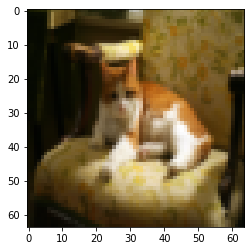

y=[1], class=[b'cat']


In [17]:
plt.imshow(x_train[7])
plt.show()
print('y={}, class={}'.format(y_train[:, 7], classes[y_train[:, 7]]))

##### وکتورسازی و نرمال کردن داده‌ها با توجه به نکته‌ی ذکر شده در صورت تمرین

In [18]:
x_train = (x_train.reshape(x_train.shape[0], -1).T)/255
x_test = (x_test.reshape(x_test.shape[0], -1).T)/255

##### نمودار هزینه بر حسب هر ۱۰۰ اجرا رسم شده و accuracy بدست آمد:

0th iteration cost: 0.6931471805599453
100th iteration cost: 0.5845083636993087
200th iteration cost: 0.4669490409465547
300th iteration cost: 0.37600686694802077
400th iteration cost: 0.33146328932825136
500th iteration cost: 0.30327306747438293
600th iteration cost: 0.27987958658260487
700th iteration cost: 0.2600421369258757
800th iteration cost: 0.2429406846779662
900th iteration cost: 0.2280042225672606
1000th iteration cost: 0.2148195137844964
1100th iteration cost: 0.20307819060644985
1200th iteration cost: 0.1925442771670686
1300th iteration cost: 0.183033337968835
1400th iteration cost: 0.17439859438448874
1500th iteration cost: 0.16652139705400335
1600th iteration cost: 0.15930451829756614
1700th iteration cost: 0.15266732471296507
1800th iteration cost: 0.1465422350398234
1900th iteration cost: 0.1408720757031016
train acc: 99.04306220095694 test acc: 70.0


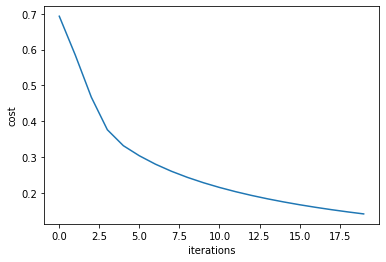

In [19]:
res = model(x_train, y_train, x_test, y_test)

plt.plot(np.squeeze(res['costs']))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

#### دقت ۹۹ درصد برای داده‌های آموزش و ۷۰ درصد برای داده‌های تست حاصل شد